## Hopf Oscillators Power Coupled

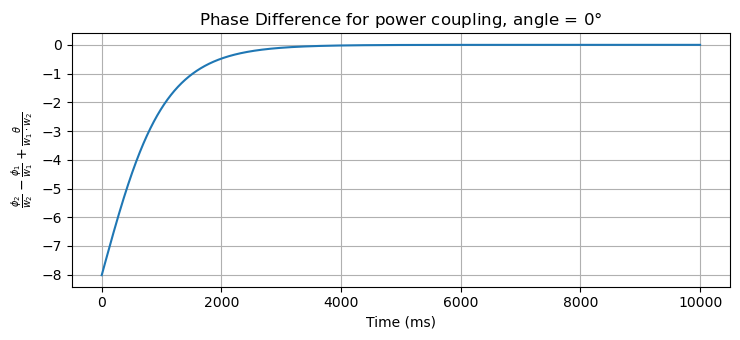

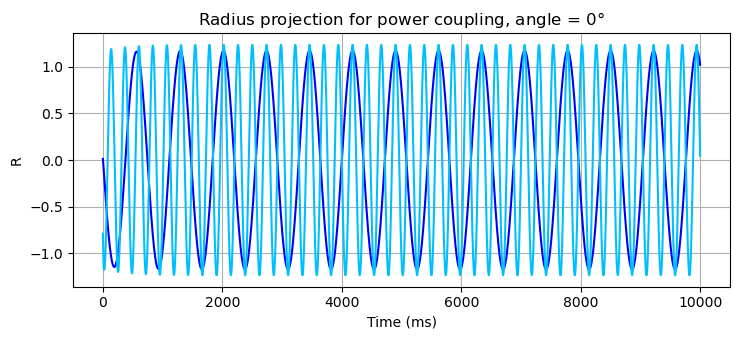

In [118]:
# import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# set parameters
w1 = 5
w2 = 15
theta_val = [-47, 98] 
#theta_val = [0]
mu = 1

# define the hopf equations in polar coordinates for power coupling 
dp1dt = lambda r1, r2, p1, p2 : w1 + A12*(r2**(w1/w2)/r1)*math.sin(math.radians(w1*((p2/w2) - (p1/w1) + theta/(w1*w2))))
dp2dt = lambda r1, r2, p1, p2 : w2 + A21*(r1**(w2/w1)/r2)*math.sin(math.radians(w2*((p1/w1) - (p2/w2) + theta/(w1*w2))))
dr1dt = lambda r1, r2, p1, p2 : mu*(1 - r1**2)*r1 + A12*(r2**(w1/w2))*math.cos(math.radians(w1*((p2/w2) - (p1/w1) + theta/(w1*w2))))
dr2dt = lambda r1, r2, p1, p2 : mu*(1 - r2**2)*r2 + A12*(r1**(w2/w1))*math.cos(math.radians(w1*((p1/w1) - (p2/w2) + theta/(w1*w2))))

def Integrator_P(r1, r2, p1, p2, dt, total_time, A12, A21): # initialize the euler integrator
    iteration = int(total_time // dt) # number of time steps will be total time devided by time of one time step
    p1_values = [p1]
    p2_values = [p2]
    r1_values = [r1]
    r2_values = [r2]
    
    for i in range(iteration):
        p1_next, p2_next = (p1 + dp1dt(r1, r2, p1, p2)*dt), (p2 + dp2dt(r1, r2, p1, p2)*dt)
        
        p1_values.append(p1_next)
        p2_values.append(p2_next)
        
        r1_next, r2_next = (r1 + dr1dt(r1, r2, p1, p2)*dt), (r2 + dr2dt(r1, r2, p1, p2)*dt)

        r1_values.append(r1_next)
        r2_values.append(r2_next)
        
        p1 = p1_next
        p2 = p2_next
        
        r1, r2 = r1_next, r2_next

    return p1_values, p2_values, r1_values, r2_values

random.seed(1000) 
# random.seed(100)
# random.seed(10)
# random.seed(40)
# random.seed(420)
#random.seed(68)

dt = 0.1 # time step is one ms
total_time = 1000 # iteration = 10000 
A12 = 0.4 # A12 and A21, set equal for this case
A21 = 0.4

#initialzing all start parameters as random (with seed)
r1 = random.random()
r2 = random.random()
p1 = random.uniform(-180, 180)
p2 = random.uniform(-180, 180)

# print(p1,p2,r1,r2) sanity check

# for loop to find the change in phase difference and radial projection with increase in number of time steps
for angle in theta_val : 
    theta = angle
    phi_1, phi_2, r_1, r_2 = Integrator_P(r1, r2, p1, p2, dt, total_time, A12, A21)
    
    Phase_difference = []
    for i in range(len(phi_1)):
        Phase_difference.append((phi_2[i] /w2) - (phi_1[i]/w1) + theta/(w1*w2))

    r1_cosp1 = []
    r2_cosp2 = []
    for val in range(len(r_1)):
        r1_cosp1.append(r_1[val]*math.cos(math.radians(phi_1[val])))
        r2_cosp2.append(r_2[val]*math.cos(math.radians(phi_2[val])))

    #plotting those changes
    title_1 = "Phase Difference for power coupling, angle = " + str(theta) 
    plt.title(title_1 + "$\degree$")
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.plot(range(len(Phase_difference)), Phase_difference)
    plt.grid()
    plt.xlabel("Time (ms)")
    plt.ylabel(''r'$\frac{\phi_2}{w_2}-\frac{\phi_1}{w_1} + \frac{\theta}{w_1 \cdot w_2}$')
    #plt.savefig( title_1 +'.png')
    plt.show()

    # plot of r's as a function of timestep
    title_2 = "Radius projection for power coupling, angle = " + str(theta) 
    plt.title(title_2 + "$\degree$")
    plt.plot(range(len(r1_cosp1)), r1_cosp1, color = 'blue')
    plt.plot(range(len(r2_cosp2)), r2_cosp2, color = 'deepskyblue')
    plt.grid()
    plt.xlabel("Time (ms)")
    plt.ylabel('R')
    #plt.savefig( title_2 +'.png')
    plt.show()

####################################################################
# plt.title('Phase Difference for power coupling, theta = 0 $\degree$')
# plt.plot(range(10000), Phase_difference_1000, color = 'black')
# plt.plot(range(10000), Phase_difference_100, color = 'black')
# plt.plot(range(10000), Phase_difference_10, color = 'black')
# plt.plot(range(10000), Phase_difference_40, color = 'black')
# plt.plot(range(10000), Phase_difference_420, color = 'black')
# plt.plot(range(10000), Phase_difference_68, color = 'black')
# plt.plot(range(10000), [0]*10000, color = 'magenta', label = '0')
# # plt.plot(range(10000), [-180]*10000, color = 'Green', label = '-180')
# # plt.plot(range(10000), [180]*10000, color = 'Red', label = '180')
# plt.grid()
# plt.xlabel("Time (ms)")
# plt.ylabel(''r'$\frac{\phi_2}{w_2}-\frac{\phi_1}{w_1} + \frac{\theta}{w_1\cdot w_2}$')
# plt.legend()
# #plt.savefig('plot_for_0.png')
# plt.show()
####################################################################